In [ ]:
from matplotlib import pyplot as ply
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#https://www.kaggle.com/datasets/camnugent/california-housing-prices
df=pd.read_csv("C:\\Users\\sew-th\\Documents\\Python Datasets\\california housing.csv")
df


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

<Axes: >

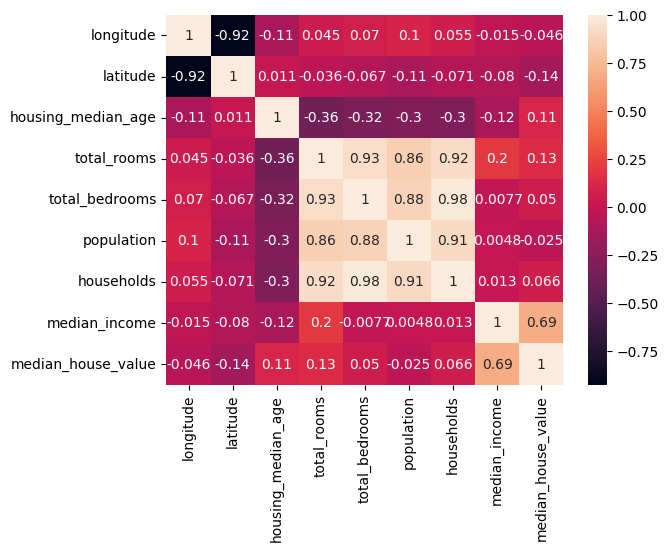

In [3]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
#multicolinearity
#  in 4 variables as evidenced in the heatmap below. Principal component analysis reduces the amount of variables and eliminates multicolinearity.

In [4]:
#dropping categorical columns and empty rows which are only present in total_bedrooms
#scaling
df3=df.drop(['ocean_proximity','total_bedrooms'], axis=1)
scaler=StandardScaler()
scaler.fit(df3)
df4=pd.DataFrame(scaler.transform(df3), columns=df3.columns)

In [5]:
#only fit to check cumsum. 3 principal component seem sufficient (0.82 of variance explained)
pca=PCA(n_components=7)
pca= pca.fit(df4)
pca.explained_variance_ratio_.cumsum()

array([0.37530161, 0.61350859, 0.82497211, 0.93632901, 0.97213816,
       0.9877085 , 0.99466278])

In [6]:
#To see factor loadings by each pc.
#only works with fit, not fit_transform. 
pca_loading=pd.DataFrame(pca.components_, columns=df3.columns )
pca_loading


longitude  latitude  housing_median_age  total_rooms  population  \
0   0.124257 -0.126669           -0.269459     0.546841    0.532850   
1  -0.663420  0.688167           -0.035248     0.120667    0.099067   
2  -0.223124  0.100623            0.071316     0.051807   -0.111189   
3  -0.044410 -0.080609            0.917085     0.082835    0.186713   
4   0.103544  0.079539            0.271304     0.131250    0.109880   
5  -0.199837 -0.143181           -0.071154    -0.598014    0.736656   
6   0.395036  0.406506            0.021261     0.328595    0.322550   

   households  median_income  median_house_value  
0    0.544123       0.105214            0.076176  
1    0.125228      -0.138352           -0.160811  
2   -0.058889       0.672110            0.681731  
3    0.199261      -0.213472            0.153255  
4   -0.144997       0.654584           -0.656157  
5   -0.163645       0.077156            0.038562  
6   -0.627386      -0.170547            0.208649

In [7]:
#doing principal component analysis to reduce variables
pca=PCA(n_components=3)
pca= pca.fit_transform(df4)
pca_data=pd.DataFrame(pca, columns=(['pc1','pc2','pc3']))

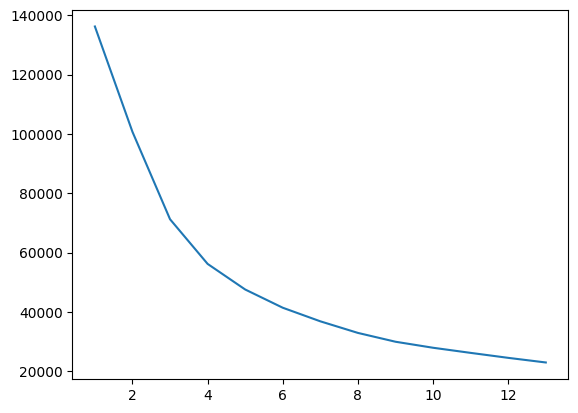

In [8]:
#how many clusters to take with elbow method. It shows the intra cluster spread. Based on the plot 3 cluster seem good enough.
Sum_of_squared_distances = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k, n_init=10).fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)

In [9]:
#doing kmeans
pca_data['Cluster']=KMeans(n_clusters=3, n_init=10).fit_predict(pca_data)
pca_data['Cluster']=pca_data['Cluster'].astype('category')
#adding to original dataframe
df['Cluster']=pca_data['Cluster'].astype('category')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity Cluster  
0            NEAR BAY       1  
1            NEAR BAY       2  
2            NEAR BAY       1  
3            NEAR BAY       1  
4            NEAR BAY       1  
...               ...     ...  
20635          INLAND       1  
20636          INLAND       1  
20637          INLAND       1  
20638          INLAND       1  
20639          INLAND       1  

[20640 rows x 11 columns]

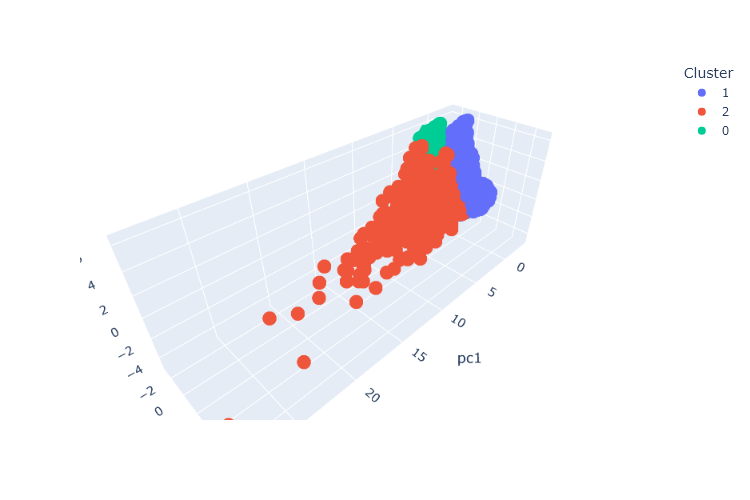

In [18]:
fig = px.scatter_3d(pca_data, 'pc1','pc2','pc3', color='Cluster', width=750,height=500)
fig.show('png')


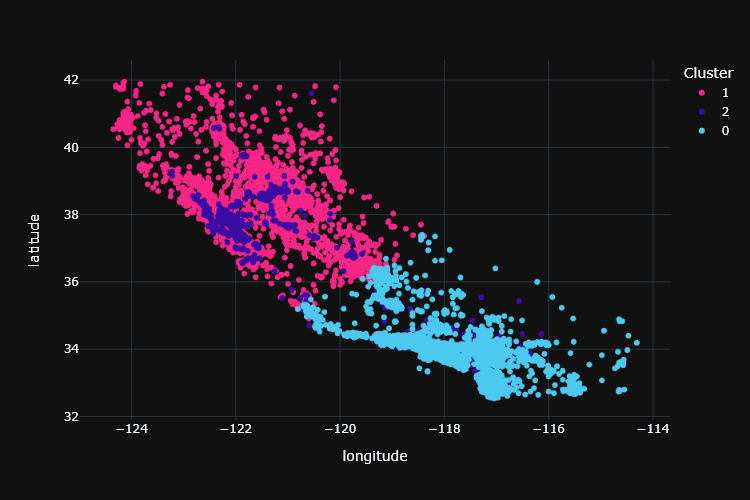

In [10]:
fig = px.scatter(df, 'longitude', 'latitude', color='Cluster', color_discrete_sequence=["#F72585",'#3A0CA3','#4CC9F0'], template='plotly_dark',width=750,height=500 )
fig.show('png')
#cluster 2 stands out.

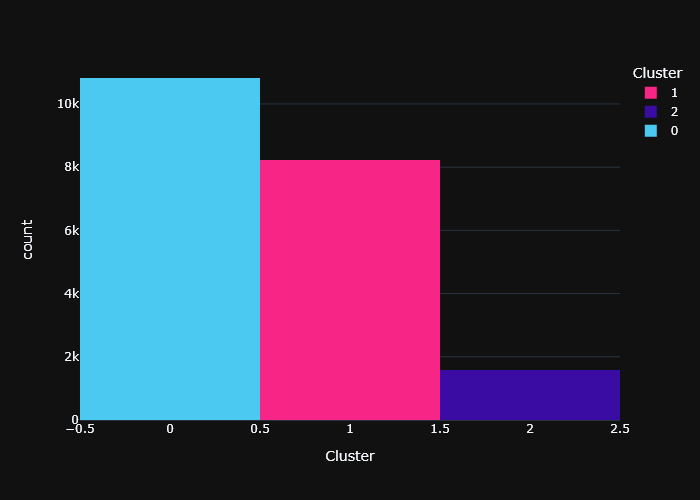

In [11]:
#how many datapoints by cluster are there
fig = px.histogram(df, 'Cluster', color='Cluster', color_discrete_sequence=["#F72585",'#3A0CA3','#4CC9F0'], template='plotly_dark')
fig.show('png')

Analysis

- Cluster 2 households are located mostly around one region. This cluster is the smallest.
- cluster 2 has homes with a lower median_age and more rooms.Even though its the smallest cluster it has the biggest population
- cluster 2 also has a higher average house value and income
- based on the coordinates we can assume cluster 2 corresponds to the people from sillicon valley. 

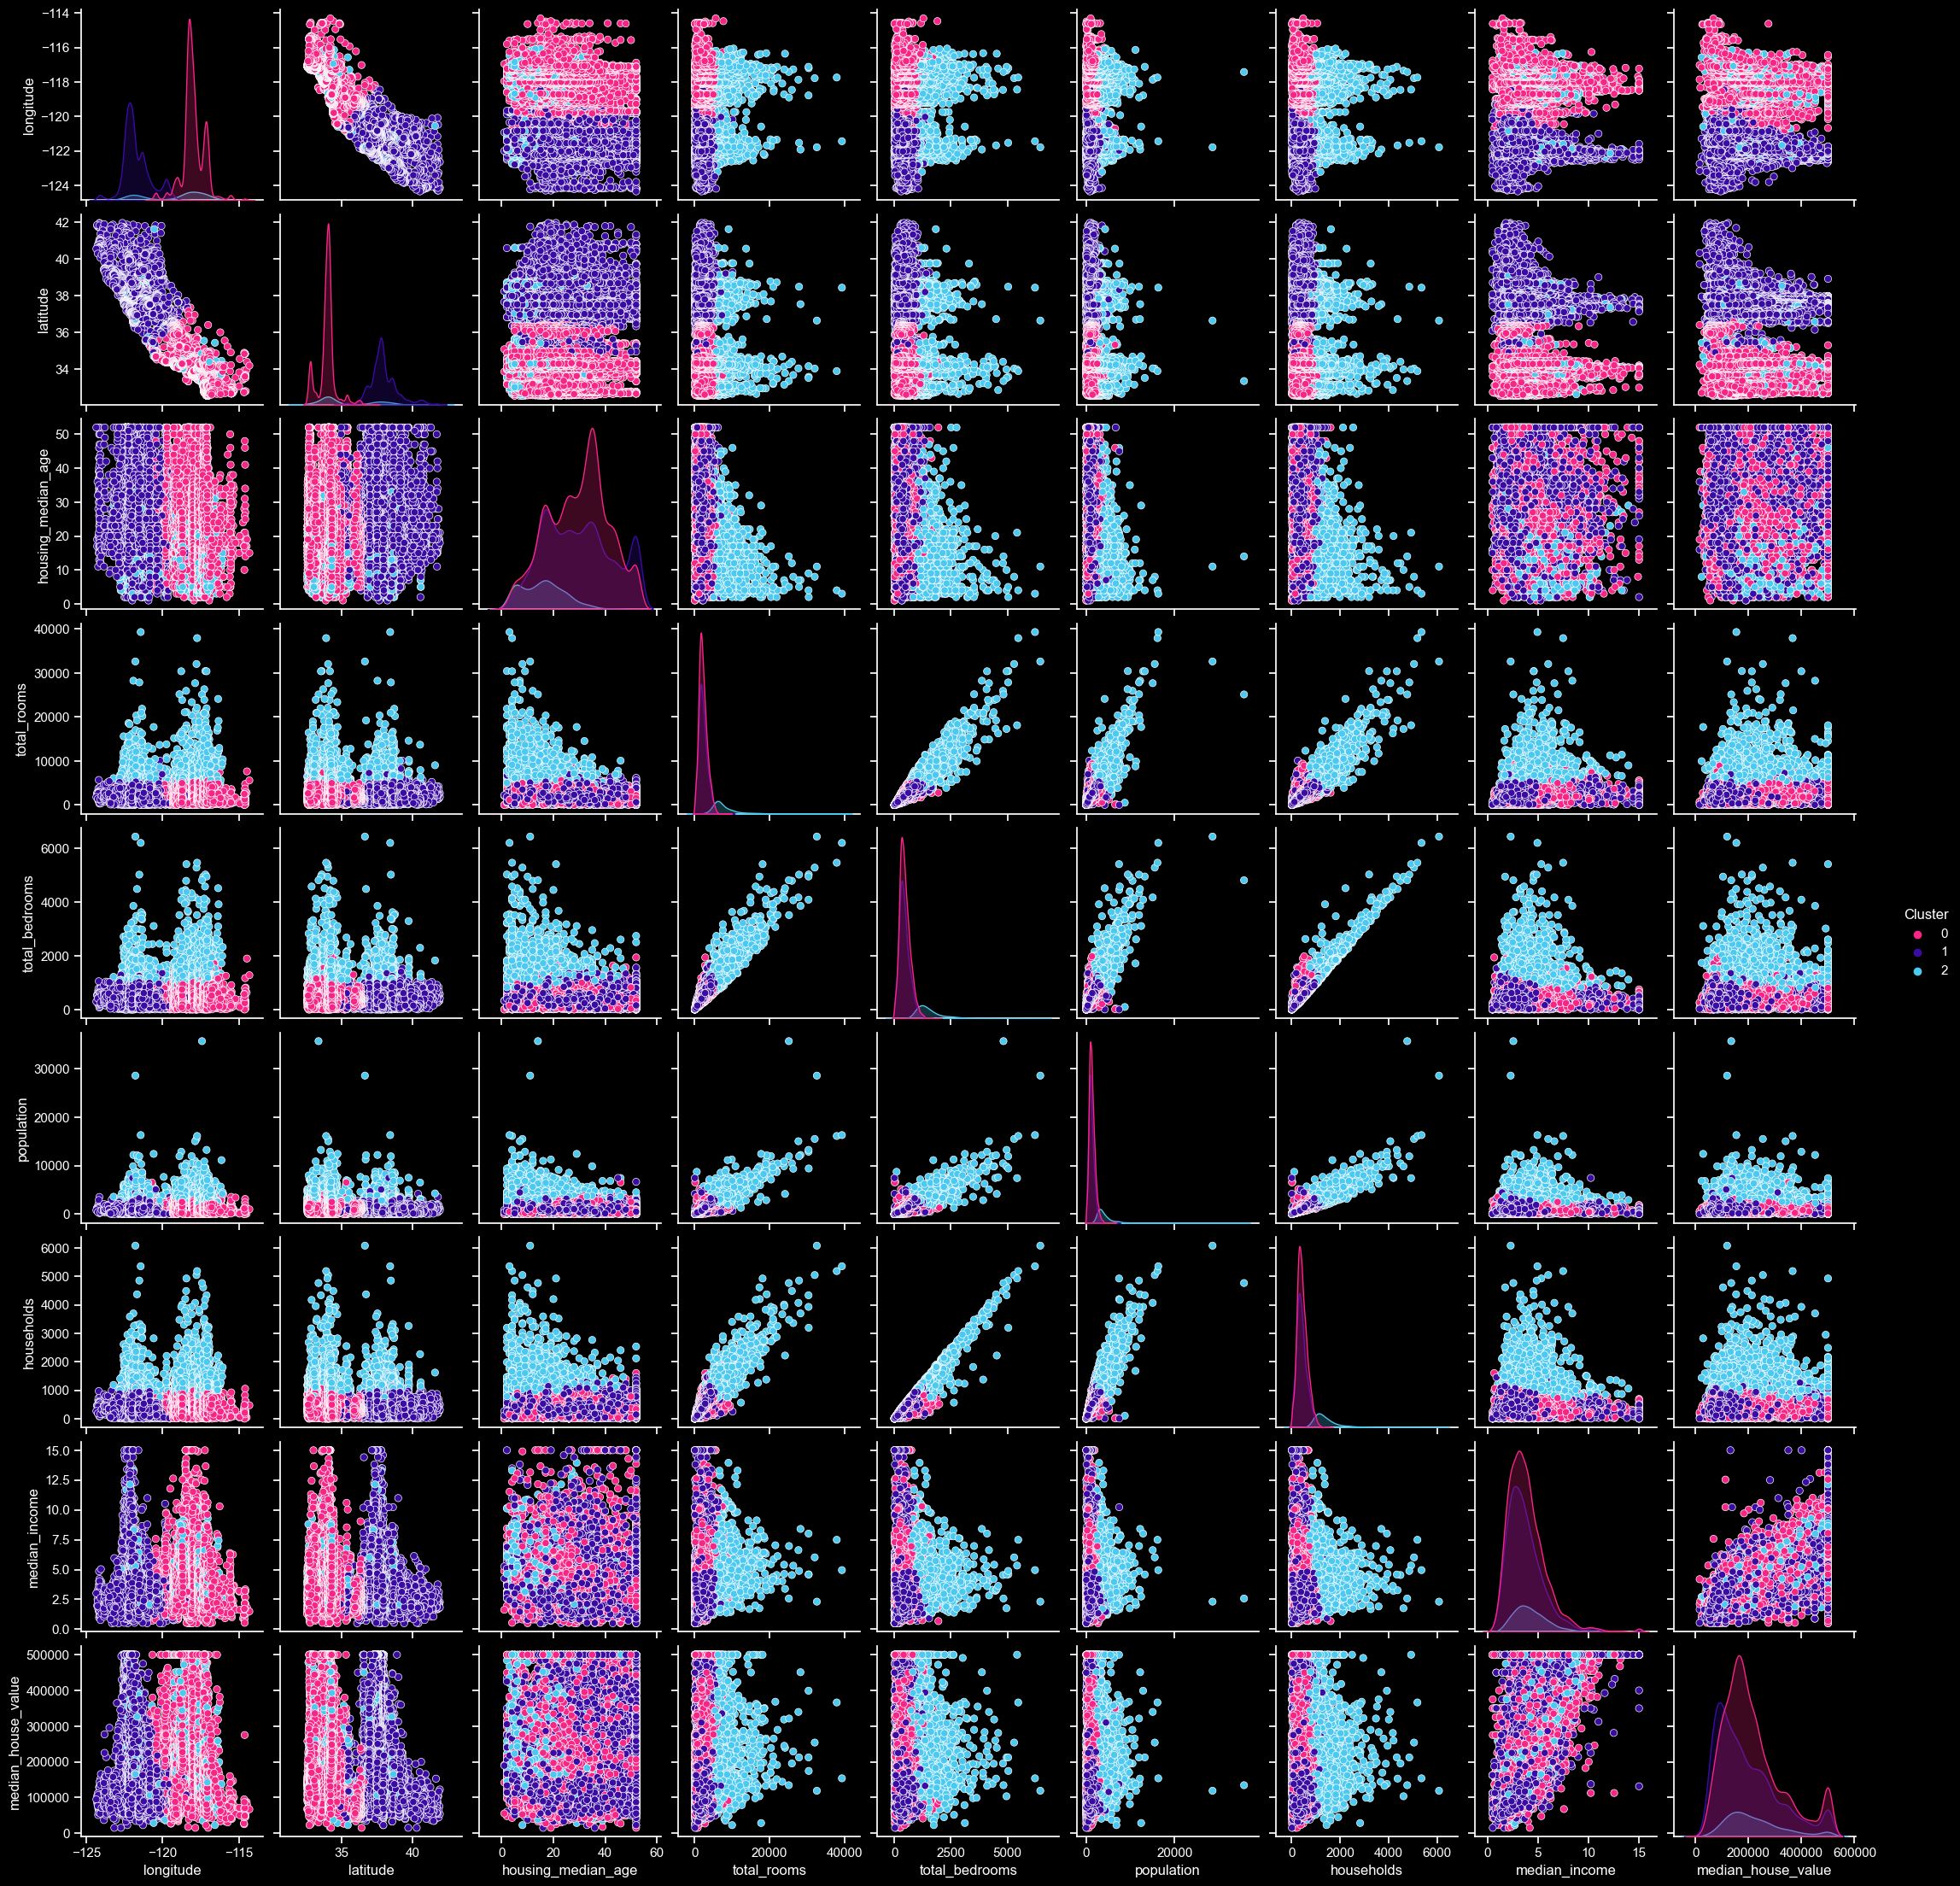

In [ ]:
# Showing the relations of all numeric columns
sns.set(style="ticks")
plt.style.use("dark_background")
sns.pairplot(df, hue='Cluster', palette=["#F72585",'#3A0CA3','#4CC9F0'])

In [15]:
#small table showing the mean values by cluster
df.groupby(by='Cluster').mean( numeric_only=True)

longitude   latitude  housing_median_age  total_rooms  \
Cluster                                                           
0       -118.010208  33.927108           29.641656  2182.860654   
1       -121.699361  37.948322           29.771411  2194.845377   
2       -119.176145  35.261108           16.030038  7970.965582   

         total_bedrooms   population   households  median_income  \
Cluster                                                            
0            460.376202  1272.476529   429.998060       3.893222   
1            439.029834  1111.635766   407.514599       3.747466   
2           1571.893106  4076.003129  1443.861076       4.351710   

         median_house_value  
Cluster                      
0             213972.358159  
1             194389.858029  
2             222785.086358

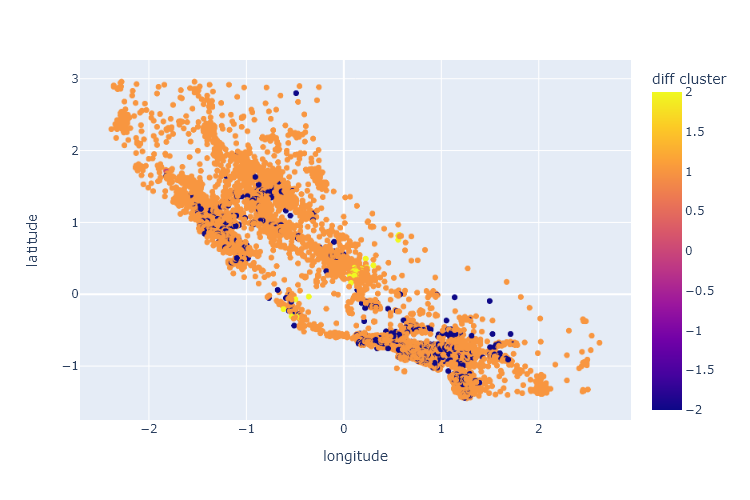

In [16]:
#testing if kmeans without pca is better
df6=df4.copy()
df6['Cluster']=KMeans(n_clusters=3, n_init=10).fit_predict(df6)
df6['Cluster']=df6['Cluster'].astype('category')
df6['PCA cluster']=df['Cluster'].astype('int32')
df6['diff cluster']=df6['Cluster'].astype('int32')-df6['PCA cluster']
fig = px.scatter(df6, 'longitude', 'latitude', color='diff cluster', width=750,height=500 )
fig.show('png')
#same clusters with or without PCA. This means the PCA was succesful - nearly the same clustering while reducing the dataset.

